## Capstone Project - The Battle of Neighborhoods
### Washinton State Food Choice
#### Part 1: Data about the districts of WA

In [1]:
!pip install lxml
!pip install geopy
!pip install folium
!pip install -U scikit-learn scipy matplotlib

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML   
# tranforming json file into a pandas dataframe library
from pandas import json_normalize
import folium # plotting library
import json
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans
import seaborn as sns

print('Folium installed')
print('Libraries imported.')


Folium installed
Libraries imported.


#### A: I use pandas to create a dataframe from the table on the Wikipedia page.

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_counties_in_Washington')[1]

In [3]:
df

,County,FIPS code,County seat[11],Est.[11][12],Formed from[12][13],Etymology,Population (2019),Land area[11],Map
0,Adams County,1,Ritzville,1883,Whitman County,"John Adams (1735–1826), 2nd U.S. President[14]",19983,"1,925 sq mi(4,986 km2)",NaN
1,Asotin County,3,Asotin,1883,Garfield County,The Nez Percé name for Eel Creek[15],22582,"636 sq mi(1,647 km2)",NaN
2,Benton County,5,Prosser,1905,Yakima and Klickitat Counties,"Thomas Hart Benton (1782–1858), a U.S. Senator...",204390,"1,700 sq mi(4,403 km2)",NaN
3,Chelan County,7,Wenatchee,1899,Okanogan and Kittitas Counties,"A Native American word meaning ""deep water"", r...",77200,"2,920 sq mi(7,563 km2)",NaN
4,Clallam County,9,Port Angeles,1854,Jefferson County,"A Klallam word meaning ""brave people"" or ""the ...",77331,"1,738 sq mi(4,501 km2)",NaN
5,Clark County,11,Vancouver,1845,Original County,"William Clark (1770–1838), the co-captain of t...",488241,"629 sq mi(1,629 km2)",NaN
6,Columbia County,13,Dayton,1875,Walla Walla County,The Columbia River[18],3985,"869 sq mi(2,251 km2)",NaN
7,Cowlitz County,15,Kelso,1854,Lewis County,"Cowlitz, an Indian tribe[19]",110593,"1,139 sq mi(2,950 km2)",NaN
8,Douglas County,17,Waterville,1883,Lincoln County,"Stephen A. Douglas (1813–1861), U.S. Senator f...",43429,"1,819 sq mi(4,711 km2)",NaN
9,Ferry County,19,Republic,1899,Stevens County,"Elisha P. Ferry (1825–1895), 1st Governor of W...",7627,"2,204 sq mi(5,708 km2)",NaN


#### B: I drop columns which are not required.

In [4]:
df.drop([39], inplace=True)

In [6]:
df.tail()

,County,FIPS code,County seat[11],Est.[11][12],Formed from[12][13],Etymology,Population (2019),Land area[11],Map
34,Wahkiakum County,69,Cathlamet,1854,Cowlitz County,"Wakaiakam, chief of the Kathlamet tribe[38]",4488,264 sq mi(684 km2),NaN
35,Walla Walla County,71,Walla Walla,1854,Skamania County,"The Walla Walla tribe, also a Nez Percé name f...",60760,"1,270 sq mi(3,289 km2)",NaN
36,Whatcom County,73,Bellingham,1854,Island County,"Whatcom, chief of the Nooksack tribe and named...",229247,"2,107 sq mi(5,457 km2)",NaN
37,Whitman County,75,Colfax,1871,Stevens County,"Marcus Whitman (1802–1847), a Methodist missio...",50104,"2,159 sq mi(5,592 km2)",NaN
38,Yakima County,77,Yakima,1865,Ferguson County (defunct),"The Yakama tribe, meaning ""runaway [waters]"" o...",250873,"4,296 sq mi(11,127 km2)",NaN


In [7]:
df.drop(df.columns[[1, 2, 3, 4, 5, 8]], axis = 1, inplace = True)
df.head()

,County,Population (2019),Land area[11]
0,Adams County,19983,"1,925 sq mi(4,986 km2)"
1,Asotin County,22582,"636 sq mi(1,647 km2)"
2,Benton County,204390,"1,700 sq mi(4,403 km2)"
3,Chelan County,77200,"2,920 sq mi(7,563 km2)"
4,Clallam County,77331,"1,738 sq mi(4,501 km2)"


In [8]:
df['County'] = df['County'] + ' of Washington'
df.tail()

,County,Population (2019),Land area[11]
34,Wahkiakum County of Washington,4488,264 sq mi(684 km2)
35,Walla Walla County of Washington,60760,"1,270 sq mi(3,289 km2)"
36,Whatcom County of Washington,229247,"2,107 sq mi(5,457 km2)"
37,Whitman County of Washington,50104,"2,159 sq mi(5,592 km2)"
38,Yakima County of Washington,250873,"4,296 sq mi(11,127 km2)"


### Part 2: Geospatial data from Foursquare

In [9]:
geolocator = Nominatim(user_agent="Washinton_food")

df['County1']= df['County'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['County1'].apply(pd.Series)

df.drop(['County1'], axis=1, inplace=True)
df

,County,Population (2019),Land area[11],Latitude,Longitude
0,Adams County of Washington,19983,"1,925 sq mi(4,986 km2)",46.972363,-118.593464
1,Asotin County of Washington,22582,"636 sq mi(1,647 km2)",46.167808,-117.204518
2,Benton County of Washington,204390,"1,700 sq mi(4,403 km2)",46.169170,-119.528642
3,Chelan County of Washington,77200,"2,920 sq mi(7,563 km2)",47.801220,-120.627690
4,Clallam County of Washington,77331,"1,738 sq mi(4,501 km2)",47.999838,-123.737347
5,Clark County of Washington,488241,"629 sq mi(1,629 km2)",45.766905,-122.494087
6,Columbia County of Washington,3985,"869 sq mi(2,251 km2)",46.294767,-117.917470
7,Cowlitz County of Washington,110593,"1,139 sq mi(2,950 km2)",46.199863,-122.693151
8,Douglas County of Washington,43429,"1,819 sq mi(4,711 km2)",47.765271,-119.607536
9,Ferry County of Washington,7627,"2,204 sq mi(5,708 km2)",48.473693,-118.483436


### Part 3: Building clusters of the neighborhoods in WA

#### A: Geographical coordinates of WA

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

address = 'Washinton State'

geolocator = Nominatim(user_agent="Washinton_food")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of WA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of WA are 31.6201479, -96.2847875.


#### B: Visualization of WA's neighborhoods

In [11]:
# create map of WA using latitude and longitude 
map_WA = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['County']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_WA) 
    
map_WA

#### C: Using Foursquare API, I will explore the neighborhoods of WA and segment them.

In [12]:
CLIENT_ID = 'OVSXQS1PMHGJ5ZFYC3ZAEKAY5JXN0HT4ZI2AK2VL0QGC0L5Z' # your Foursquare ID
CLIENT_SECRET = '13RBDKYGUJRHVIY0OPPVLOLYN1DBWQKR2VLDOOAWNT14ODBB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 150 # A default Foursquare API limit value

In [15]:
df.loc[26, 'County']

'Pierce County of Washington'

In [14]:
neighborhood_latitude = df.loc[26, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[26, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[26, 'County'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Pierce County of Washington are 47.0022547, -122.2117983.


#### D: Show the top venues in Pierce County within a radius of 1000 meters.

In [16]:
LIMIT = 15

radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=OVSXQS1PMHGJ5ZFYC3ZAEKAY5JXN0HT4ZI2AK2VL0QGC0L5Z&client_secret=13RBDKYGUJRHVIY0OPPVLOLYN1DBWQKR2VLDOOAWNT14ODBB&v=20180605&ll=47.0022547,-122.2117983&radius=1000&limit=15'

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '606e40b07a96fb446ac718cf'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 47.01125470900001,
    'lng': -122.19862585767207},
   'sw': {'lat': 46.99325469099999, 'lng': -122.22497074232793}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d24b618668f60fcc42cb26f',
       'name': 'M.T. Head Brewing',
       'location': {'address': '27307 159th Ave E',
        'lat': 47.00830841064453,
        'lng': -122.21759796142578,
        'labeledLatLngs': [{'

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
# assign relevant part of JSON to venues
venues = results['response']['groups'][0]['items']
# tranform venues into a dataframe   
nearby_venues = json_normalize(venues)
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups
0,e-0-4d24b618668f60fcc42cb26f-0,0,"[{'summary': 'This spot is popular', 'type': '...",4d24b618668f60fcc42cb26f,M.T. Head Brewing,27307 159th Ave E,47.008308,-122.217598,"[{'label': 'display', 'lat': 47.00830841064453...",804,98338,US,Graham,WA,United States,"[27307 159th Ave E, Graham, WA 98338, United S...","[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",0,[]


In [20]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,M.T. Head Brewing,Pub,47.008308,-122.217598


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
print ('{} unique categories in Pierce County.'.format(nearby_venues['categories'].value_counts().shape[0]))
print (nearby_venues['categories'].value_counts()[0:15])

1 venues were returned by Foursquare.
1 unique categories in Pierce County.
Pub    1
Name: categories, dtype: int64


#### E: Exploration of the neighbourhoods in WA.

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [23]:
WA_venues = getNearbyVenues(names=df['County'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Adams County of Washington
Asotin County of Washington
Benton County of Washington
Chelan County of Washington
Clallam County of Washington
Clark County of Washington
Columbia County of Washington
Cowlitz County of Washington
Douglas County of Washington
Ferry County of Washington
Franklin County of Washington
Garfield County of Washington
Grant County of Washington
Grays Harbor County of Washington
Island County of Washington
Jefferson County of Washington
King County of Washington
Kitsap County of Washington
Kittitas County of Washington
Klickitat County of Washington
Lewis County of Washington
Lincoln County of Washington
Mason County of Washington
Okanogan County of Washington
Pacific County of Washington
Pend Oreille County of Washington
Pierce County of Washington
San Juan County of Washington
Skagit County of Washington
Skamania County of Washington
Snohomish County of Washington
Spokane County of Washington
Stevens County of Washington
Thurston County of Washington
Wahkiakum Co

In [24]:
WA_venues.shape

(217, 7)

In [25]:
WA_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams County of Washington,46.972363,-118.593464,Birth & Baby,46.971630,-118.616310,Clothing Store
1,Adams County of Washington,46.972363,-118.593464,Slim's,46.971845,-118.616446,Bar
2,Adams County of Washington,46.972363,-118.593464,Jims Market,46.971950,-118.616590,Grocery Store
3,Chelan County of Washington,47.801220,-120.627690,Thousand Trails--Leavenworth,47.795546,-120.629269,Campground
4,Chelan County of Washington,47.801220,-120.627690,Cabin in the woods,47.800966,-120.639895,River
5,Chelan County of Washington,47.801220,-120.627690,Wanna Go Away Cabin,47.791080,-120.642180,Vacation Rental
6,Chelan County of Washington,47.801220,-120.627690,Country Bear Lodge,47.790716,-120.642943,Campground
7,Chelan County of Washington,47.801220,-120.627690,Jordan's Lodge,47.788048,-120.645470,Bed & Breakfast
8,Chelan County of Washington,47.801220,-120.627690,Brunners Lodge,47.787367,-120.645526,Hotel
9,Chelan County of Washington,47.801220,-120.627690,Serenity Pines Lodge,47.785274,-120.653843,Hotel


In [26]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
WA_Venues_only_restaurant = WA_venues[WA_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
WA_Venues_only_restaurant.index = np.arange(1, len(WA_Venues_only_restaurant )+1)


#### F: Size of the dataframe that results.

In [27]:
print (WA_Venues_only_restaurant['Venue Category'].value_counts())

American Restaurant              6
Seafood Restaurant               5
Mexican Restaurant               3
New American Restaurant          3
Fast Food Restaurant             3
Italian Restaurant               3
Chinese Restaurant               3
Restaurant                       2
Thai Restaurant                  1
Comfort Food Restaurant          1
Vegetarian / Vegan Restaurant    1
Asian Restaurant                 1
Japanese Restaurant              1
Vietnamese Restaurant            1
Name: Venue Category, dtype: int64


In [28]:
print('There are {} unique categories.'.format(len(WA_Venues_only_restaurant['Venue Category'].unique())))

There are 14 unique categories.


In [29]:
# create a dataframe of top 10 categories
WA_Venues_Top10 = WA_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
WA_Venues_Top10=WA_Venues_Top10.reset_index()
WA_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
WA_Venues_Top10

,Venue_Category,Frequency
0,American Restaurant,6
1,Seafood Restaurant,5
2,Mexican Restaurant,3
3,New American Restaurant,3
4,Fast Food Restaurant,3
5,Italian Restaurant,3
6,Chinese Restaurant,3
7,Restaurant,2
8,Thai Restaurant,1
9,Comfort Food Restaurant,1


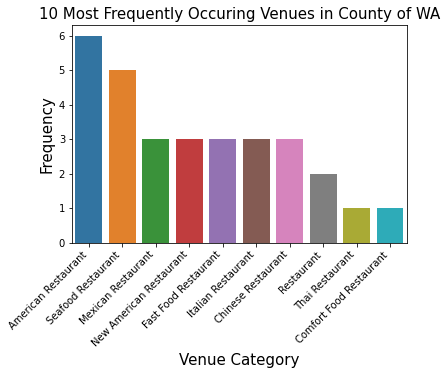

<Figure size 1296x504 with 0 Axes>

In [31]:
s=sns.barplot(x="Venue_Category", y="Frequency", data=WA_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in County of WA', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [32]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", WA_Venues_only_restaurant.shape)
WA_Venues_only_restaurant

Shape of the Data-Frame with Venue Category only Restaurant:  (34, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Clark County of Washington,45.766905,-122.494087,Los Pepes,45.775321,-122.523967,Mexican Restaurant
2,Island County of Washington,48.216267,-122.684240,Currents Bistro by the Cove,48.220228,-122.688673,New American Restaurant
3,Island County of Washington,48.216267,-122.684240,Ciao,48.218783,-122.685832,Italian Restaurant
4,Island County of Washington,48.216267,-122.684240,Oystercatcher,48.220623,-122.687089,Seafood Restaurant
5,Island County of Washington,48.216267,-122.684240,Front Street Grill,48.221273,-122.687846,American Restaurant
6,Island County of Washington,48.216267,-122.684240,Knead & Feed,48.221137,-122.686213,American Restaurant
7,Island County of Washington,48.216267,-122.684240,Tyee Cafe & Hotel,48.208048,-122.685878,American Restaurant
8,Island County of Washington,48.216267,-122.684240,Phad Thai,48.217869,-122.686239,Thai Restaurant
9,Island County of Washington,48.216267,-122.684240,Mosquito Fleet Chili,48.221303,-122.687131,American Restaurant
10,Island County of Washington,48.216267,-122.684240,Thrive Vegan Cafe,48.221450,-122.687157,Vegetarian / Vegan Restaurant


In [33]:
WA_Venues_restaurant = WA_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

#### G: Analysis of the neighbourhoods.

In [34]:
WA_Venues_restaurant

Neighborhood
Clark County of Washington        1
Island County of Washington       9
Kitsap County of Washington      12
Mason County of Washington        1
Okanogan County of Washington     1
San Juan County of Washington    10
Name: Venue Category, dtype: int64

In [35]:
WA_Venues_restaurant_df  = WA_Venues_restaurant.to_frame().reset_index()
WA_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
WA_Venues_restaurant_df.index = np.arange(1, len(WA_Venues_restaurant_df)+1)
list_rest_no =WA_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =WA_Venues_restaurant_df['Neighborhood'].to_list()

In [36]:

# one hot encoding
WA_onehot = pd.get_dummies(WA_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
WA_onehot['Neighborhood'] = WA_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [WA_onehot.columns[-1]] + list(WA_onehot.columns[:-1])
WA_onehot = WA_onehot[fixed_columns]

WA_onehot

,Neighborhood,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Clark County of Washington,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Island County of Washington,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Island County of Washington,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Island County of Washington,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,Island County of Washington,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Island County of Washington,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Island County of Washington,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Island County of Washington,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,Island County of Washington,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Island County of Washington,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [37]:
# New dataframe size.
WA_onehot.shape

(34, 15)

#### H: Grouping by neighbourhoods and showing the mean of the frequency of occurrence for each category of restaurants.

In [38]:
WA_grouped = WA_onehot.groupby('Neighborhood').mean().reset_index()
WA_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Clark County of Washington,0.000000,0.0,0.00,0.0,0.00,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,Island County of Washington,0.444444,0.0,0.00,0.0,0.00,0.111111,0.000000,0.000000,0.111111,0.0,0.111111,0.111111,0.111111,0.000000
2,Kitsap County of Washington,0.083333,0.0,0.25,0.0,0.25,0.083333,0.083333,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.083333
3,Mason County of Washington,1.000000,0.0,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,Okanogan County of Washington,0.000000,0.0,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
5,San Juan County of Washington,0.000000,0.1,0.00,0.1,0.00,0.100000,0.000000,0.000000,0.200000,0.1,0.400000,0.000000,0.000000,0.000000


In [39]:
WA_grouped.shape

(6, 15)

#### I: Print the neighbourhoods with their respective top 10 most common venues.

In [40]:
num_top_venues = 10
for hood in WA_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = WA_grouped[WA_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Clark County of Washington----
                     venue  freq
0       Mexican Restaurant   1.0
1      American Restaurant   0.0
2         Asian Restaurant   0.0
3       Chinese Restaurant   0.0
4  Comfort Food Restaurant   0.0
5     Fast Food Restaurant   0.0
6       Italian Restaurant   0.0
7      Japanese Restaurant   0.0
8  New American Restaurant   0.0
9               Restaurant   0.0


----Island County of Washington----
                           venue  freq
0            American Restaurant  0.44
1             Italian Restaurant  0.11
2        New American Restaurant  0.11
3             Seafood Restaurant  0.11
4                Thai Restaurant  0.11
5  Vegetarian / Vegan Restaurant  0.11
6               Asian Restaurant  0.00
7             Chinese Restaurant  0.00
8        Comfort Food Restaurant  0.00
9           Fast Food Restaurant  0.00


----Kitsap County of Washington----
                     venue  freq
0       Chinese Restaurant  0.25
1     Fast Food Restaurant  0.2

#### J: Creating a pandas dataframe.

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = WA_grouped['Neighborhood']

for ind in np.arange(WA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(WA_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Clark County of Washington,Mexican Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,New American Restaurant,Restaurant
1,Island County of Washington,American Restaurant,Italian Restaurant,New American Restaurant,Seafood Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant
2,Kitsap County of Washington,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,American Restaurant,Italian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Asian Restaurant,Comfort Food Restaurant,New American Restaurant
3,Mason County of Washington,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Restaurant
4,Okanogan County of Washington,Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant
5,San Juan County of Washington,Seafood Restaurant,New American Restaurant,Asian Restaurant,Comfort Food Restaurant,Italian Restaurant,Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant


#### K: Clustering the neighbourhoods with k-means.

In [112]:
# set number of clusters (I choose 5)
kclusters = 5

WA_grouped_clustering = WA_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(WA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 2, 1, 4, 0, 2], dtype=int32)

In [121]:
WA_merged = df
WA_merged

,Neighborhood,Population (2019),Land area[11],Latitude,Longitude
0,Adams County of Washington,19983,"1,925 sq mi(4,986 km2)",46.972363,-118.593464
1,Asotin County of Washington,22582,"636 sq mi(1,647 km2)",46.167808,-117.204518
2,Benton County of Washington,204390,"1,700 sq mi(4,403 km2)",46.169170,-119.528642
3,Chelan County of Washington,77200,"2,920 sq mi(7,563 km2)",47.801220,-120.627690
4,Clallam County of Washington,77331,"1,738 sq mi(4,501 km2)",47.999838,-123.737347
5,Clark County of Washington,488241,"629 sq mi(1,629 km2)",45.766905,-122.494087
6,Columbia County of Washington,3985,"869 sq mi(2,251 km2)",46.294767,-117.917470
7,Cowlitz County of Washington,110593,"1,139 sq mi(2,950 km2)",46.199863,-122.693151
8,Douglas County of Washington,43429,"1,819 sq mi(4,711 km2)",47.765271,-119.607536
9,Ferry County of Washington,7627,"2,204 sq mi(5,708 km2)",48.473693,-118.483436


In [122]:
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Clark County of Washington,Mexican Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,New American Restaurant,Restaurant
1,2,Island County of Washington,American Restaurant,Italian Restaurant,New American Restaurant,Seafood Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant
2,1,Kitsap County of Washington,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,American Restaurant,Italian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Asian Restaurant,Comfort Food Restaurant,New American Restaurant
3,4,Mason County of Washington,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Restaurant
4,0,Okanogan County of Washington,Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant
5,2,San Juan County of Washington,Seafood Restaurant,New American Restaurant,Asian Restaurant,Comfort Food Restaurant,Italian Restaurant,Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant


In [123]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted

In [124]:
neighborhoods_venues_sorted_w_clusters

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Clark County of Washington,Mexican Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,New American Restaurant,Restaurant
1,2,Island County of Washington,American Restaurant,Italian Restaurant,New American Restaurant,Seafood Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant
2,1,Kitsap County of Washington,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,American Restaurant,Italian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Asian Restaurant,Comfort Food Restaurant,New American Restaurant
3,4,Mason County of Washington,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Restaurant
4,0,Okanogan County of Washington,Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant
5,2,San Juan County of Washington,Seafood Restaurant,New American Restaurant,Asian Restaurant,Comfort Food Restaurant,Italian Restaurant,Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant


In [125]:
# add clustering labels
del neighborhoods_venues_sorted_w_clusters['Cluster Labels']
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [126]:
neighborhoods_venues_sorted_w_clusters

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Clark County of Washington,Mexican Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,New American Restaurant,Restaurant
1,2,Island County of Washington,American Restaurant,Italian Restaurant,New American Restaurant,Seafood Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant
2,1,Kitsap County of Washington,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,American Restaurant,Italian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Asian Restaurant,Comfort Food Restaurant,New American Restaurant
3,4,Mason County of Washington,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Restaurant
4,0,Okanogan County of Washington,Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant
5,2,San Juan County of Washington,Seafood Restaurant,New American Restaurant,Asian Restaurant,Comfort Food Restaurant,Italian Restaurant,Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant


In [127]:
WA_merged.rename(columns={'County':'Neighborhood'}, inplace=True)

WA_merged = WA_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

WA_merged

,Neighborhood,Population (2019),Land area[11],Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams County of Washington,19983,"1,925 sq mi(4,986 km2)",46.972363,-118.593464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Asotin County of Washington,22582,"636 sq mi(1,647 km2)",46.167808,-117.204518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Benton County of Washington,204390,"1,700 sq mi(4,403 km2)",46.169170,-119.528642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chelan County of Washington,77200,"2,920 sq mi(7,563 km2)",47.801220,-120.627690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Clallam County of Washington,77331,"1,738 sq mi(4,501 km2)",47.999838,-123.737347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Clark County of Washington,488241,"629 sq mi(1,629 km2)",45.766905,-122.494087,3.0,Mexican Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,New American Restaurant,Restaurant
6,Columbia County of Washington,3985,"869 sq mi(2,251 km2)",46.294767,-117.917470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cowlitz County of Washington,110593,"1,139 sq mi(2,950 km2)",46.199863,-122.693151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Douglas County of Washington,43429,"1,819 sq mi(4,711 km2)",47.765271,-119.607536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ferry County of Washington,7627,"2,204 sq mi(5,708 km2)",48.473693,-118.483436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
WA_merged = WA_merged.dropna()
WA_merged

,Neighborhood,Population (2019),Land area[11],Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Clark County of Washington,488241,"629 sq mi(1,629 km2)",45.766905,-122.494087,3.0,Mexican Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,New American Restaurant,Restaurant
14,Island County of Washington,85141,209 sq mi(541 km2),48.216267,-122.684240,2.0,American Restaurant,Italian Restaurant,New American Restaurant,Seafood Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant
17,Kitsap County of Washington,271473,"395 sq mi(1,023 km2)",47.594502,-122.647442,1.0,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,American Restaurant,Italian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Asian Restaurant,Comfort Food Restaurant,New American Restaurant
22,Mason County of Washington,66768,"959 sq mi(2,484 km2)",47.342964,-123.182276,4.0,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Restaurant
23,Okanogan County of Washington,42243,"5,268 sq mi(13,644 km2)",48.361262,-119.583387,0.0,Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant
27,San Juan County of Washington,17582,174 sq mi(451 km2),48.544309,-122.991950,2.0,Seafood Restaurant,New American Restaurant,Asian Restaurant,Comfort Food Restaurant,Italian Restaurant,Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant


#### Finally, let's visualize the resulting clusters.

In [129]:
# create a map with folium
map_restaurants10 = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(WA_merged['Latitude'], 
                                  WA_merged['Longitude'], 
                                  WA_merged['Neighborhood'], 
                                  WA_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

#### L: Examination of the 5 clusters.

*Cluster 1*

In [130]:
WA_merged.loc[WA_merged['Cluster Labels'] == 0, WA_merged.columns[[0] + list(range(5, WA_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Okanogan County of Washington,0.0,Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant


Cluster 1 could be called the general restaurant.

*Cluster 2*

In [131]:
WA_merged.loc[WA_merged['Cluster Labels'] == 1, WA_merged.columns[[0] + list(range(5, WA_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Kitsap County of Washington,1.0,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,American Restaurant,Italian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Asian Restaurant,Comfort Food Restaurant,New American Restaurant


Cluster 2 could be called the Chinese Restaurant cluster.

*Cluster 3*

In [132]:
WA_merged.loc[WA_merged['Cluster Labels'] == 2, WA_merged.columns[[0] + list(range(5, WA_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Island County of Washington,2.0,American Restaurant,Italian Restaurant,New American Restaurant,Seafood Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant
27,San Juan County of Washington,2.0,Seafood Restaurant,New American Restaurant,Asian Restaurant,Comfort Food Restaurant,Italian Restaurant,Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant


Cluster 3 could be called the American & seafood Restaurant cluster.

*Cluster 4*

In [133]:
WA_merged.loc[WA_merged['Cluster Labels'] == 3, WA_merged.columns[[0] + list(range(5, WA_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Clark County of Washington,3.0,Mexican Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,New American Restaurant,Restaurant


Cluster 4 could be called the Mexican Restaurant cluster.

*Cluster 5*

In [134]:
WA_merged.loc[WA_merged['Cluster Labels'] == 4, WA_merged.columns[[0] + list(range(5, WA_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Mason County of Washington,4.0,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Restaurant


Cluster 5 could be called the American & asian Restaurant cluster.

##### That's it. Thanks for reading!